Part I: Data Preparing

1. Checked the NaN value
2. Made Scatter Plots
3. Made Data Summary


In [66]:
# Importing necessary libraries
import pandas as pd

# Defining the file path
file_path = r'Data/loan_default_prediction.csv'

# Loading the data into a DataFrame
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


,age,income,credit_score,dependents,home_owner,loan_default
0,64,100000.00,583,3,0,0
1,45,16803.24,685,4,0,0
2,69,15418.51,498,2,0,0
3,63,11474.46,533,4,0,0
4,46,11536.00,454,0,1,0


In [67]:
# Checking for missing values in the dataset
print("Number of NaN values before cleaning:\n", data.isnull().sum())

# Removing rows with any NaN values
data_cleaned = data.dropna()

# Checking again for missing values to confirm
print("Number of NaN values after cleaning:\n", data_cleaned.isnull().sum())

# Saving the cleaned data back to the original file
data_cleaned.to_csv(file_path, index=False)

print("Data cleaning completed. Changes have been saved to the file.")


Number of NaN values before cleaning:
 age             0
income          0
credit_score    0
dependents      0
home_owner      0
loan_default    0
dtype: int64
Number of NaN values after cleaning:
 age             0
income          0
credit_score    0
dependents      0
home_owner      0
loan_default    0
dtype: int64
Data cleaning completed. Changes have been saved to the file.


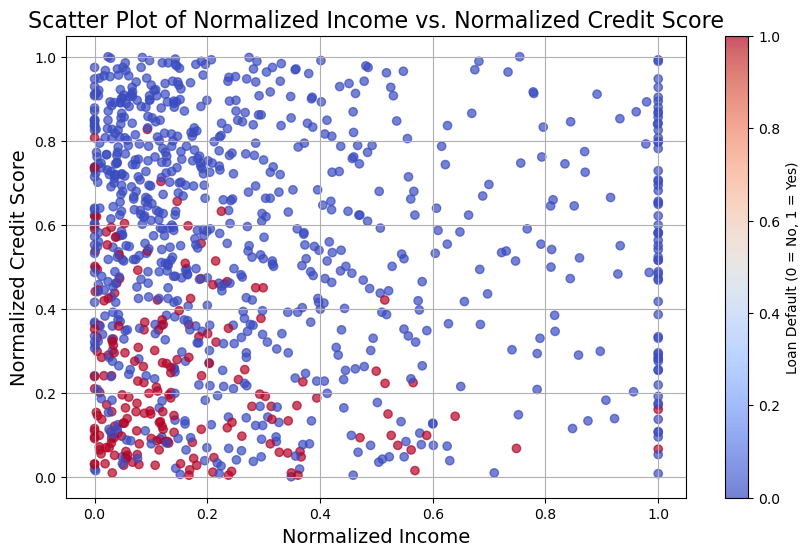

In [68]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['income', 'credit_score']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized income vs. normalized credit_score, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['income'], 
                      data_cleaned['credit_score'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')
plt.title('Scatter Plot of Normalized Income vs. Normalized Credit Score', fontsize=16)
plt.xlabel('Normalized Income', fontsize=14)
plt.ylabel('Normalized Credit Score', fontsize=14)

# Displaying the plot
plt.grid(True)
plt.show()


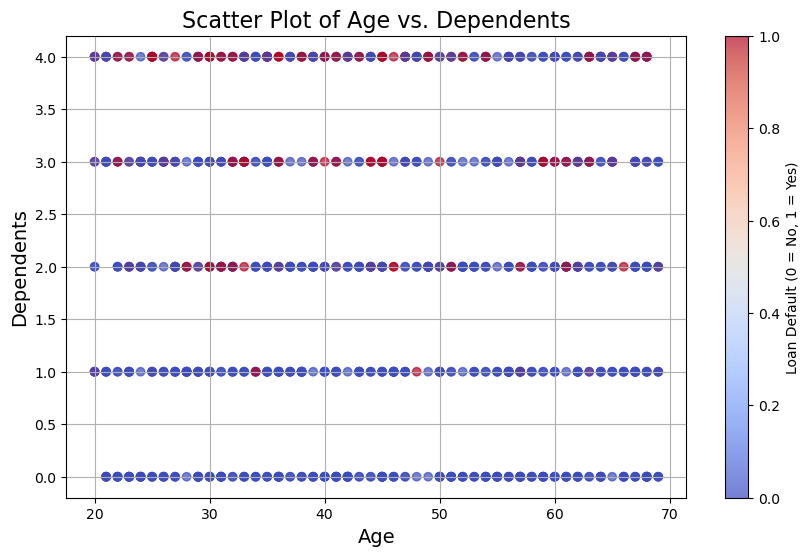

In [69]:
# Scatter plot of age vs. dependents, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['age'], 
                      data_cleaned['dependents'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Age vs. Dependents', fontsize=16)  # Title of the plot
plt.xlabel('Age', fontsize=14)  # Label for x-axis
plt.ylabel('Dependents', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()

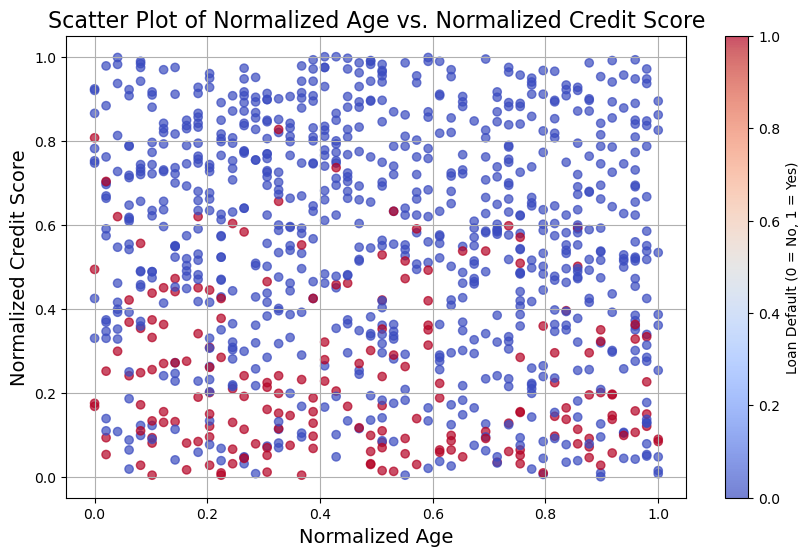

In [70]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['age', 'credit_score']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized age vs. normalized credit_score, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['age'], 
                      data_cleaned['credit_score'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Normalized Age vs. Normalized Credit Score', fontsize=16)  # Title of the plot
plt.xlabel('Normalized Age', fontsize=14)  # Label for x-axis
plt.ylabel('Normalized Credit Score', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()


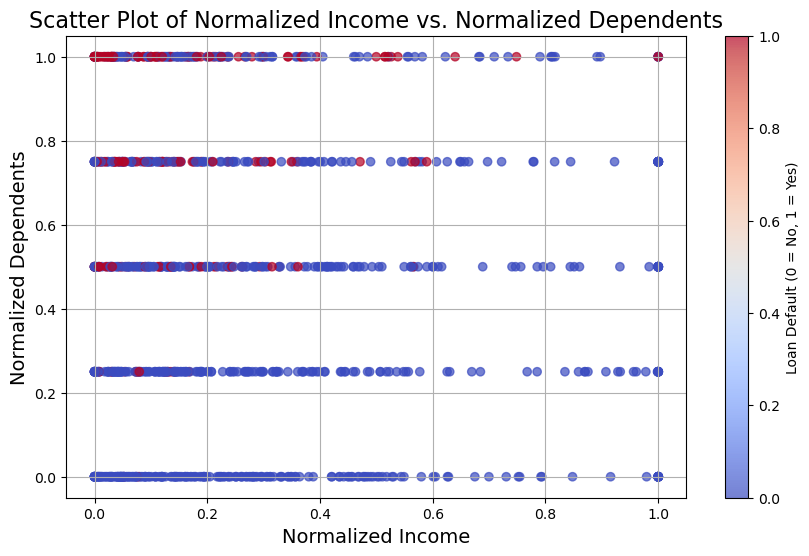

In [71]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['income', 'dependents']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized income vs. normalized dependents, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['income'], 
                      data_cleaned['dependents'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Normalized Income vs. Normalized Dependents', fontsize=16)  # Title of the plot
plt.xlabel('Normalized Income', fontsize=14)  # Label for x-axis
plt.ylabel('Normalized Dependents', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()


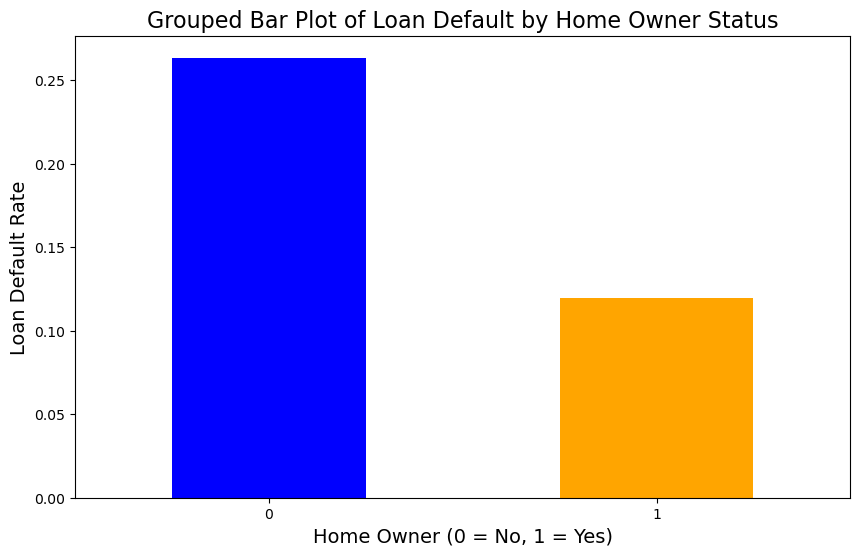

In [72]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Creating a grouped bar plot for boolean variables like 'home_owner'
plt.figure(figsize=(10, 6))

# Grouping by 'home_owner' and calculating the mean of 'loan_default' for each group
home_owner_grouped = data_cleaned.groupby('home_owner')['loan_default'].mean()

# Plotting the grouped bar chart
home_owner_grouped.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.title('Grouped Bar Plot of Loan Default by Home Owner Status', fontsize=16)
plt.xlabel('Home Owner (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Loan Default Rate', fontsize=14)

# Displaying the plot
plt.xticks(rotation=0)
plt.show()


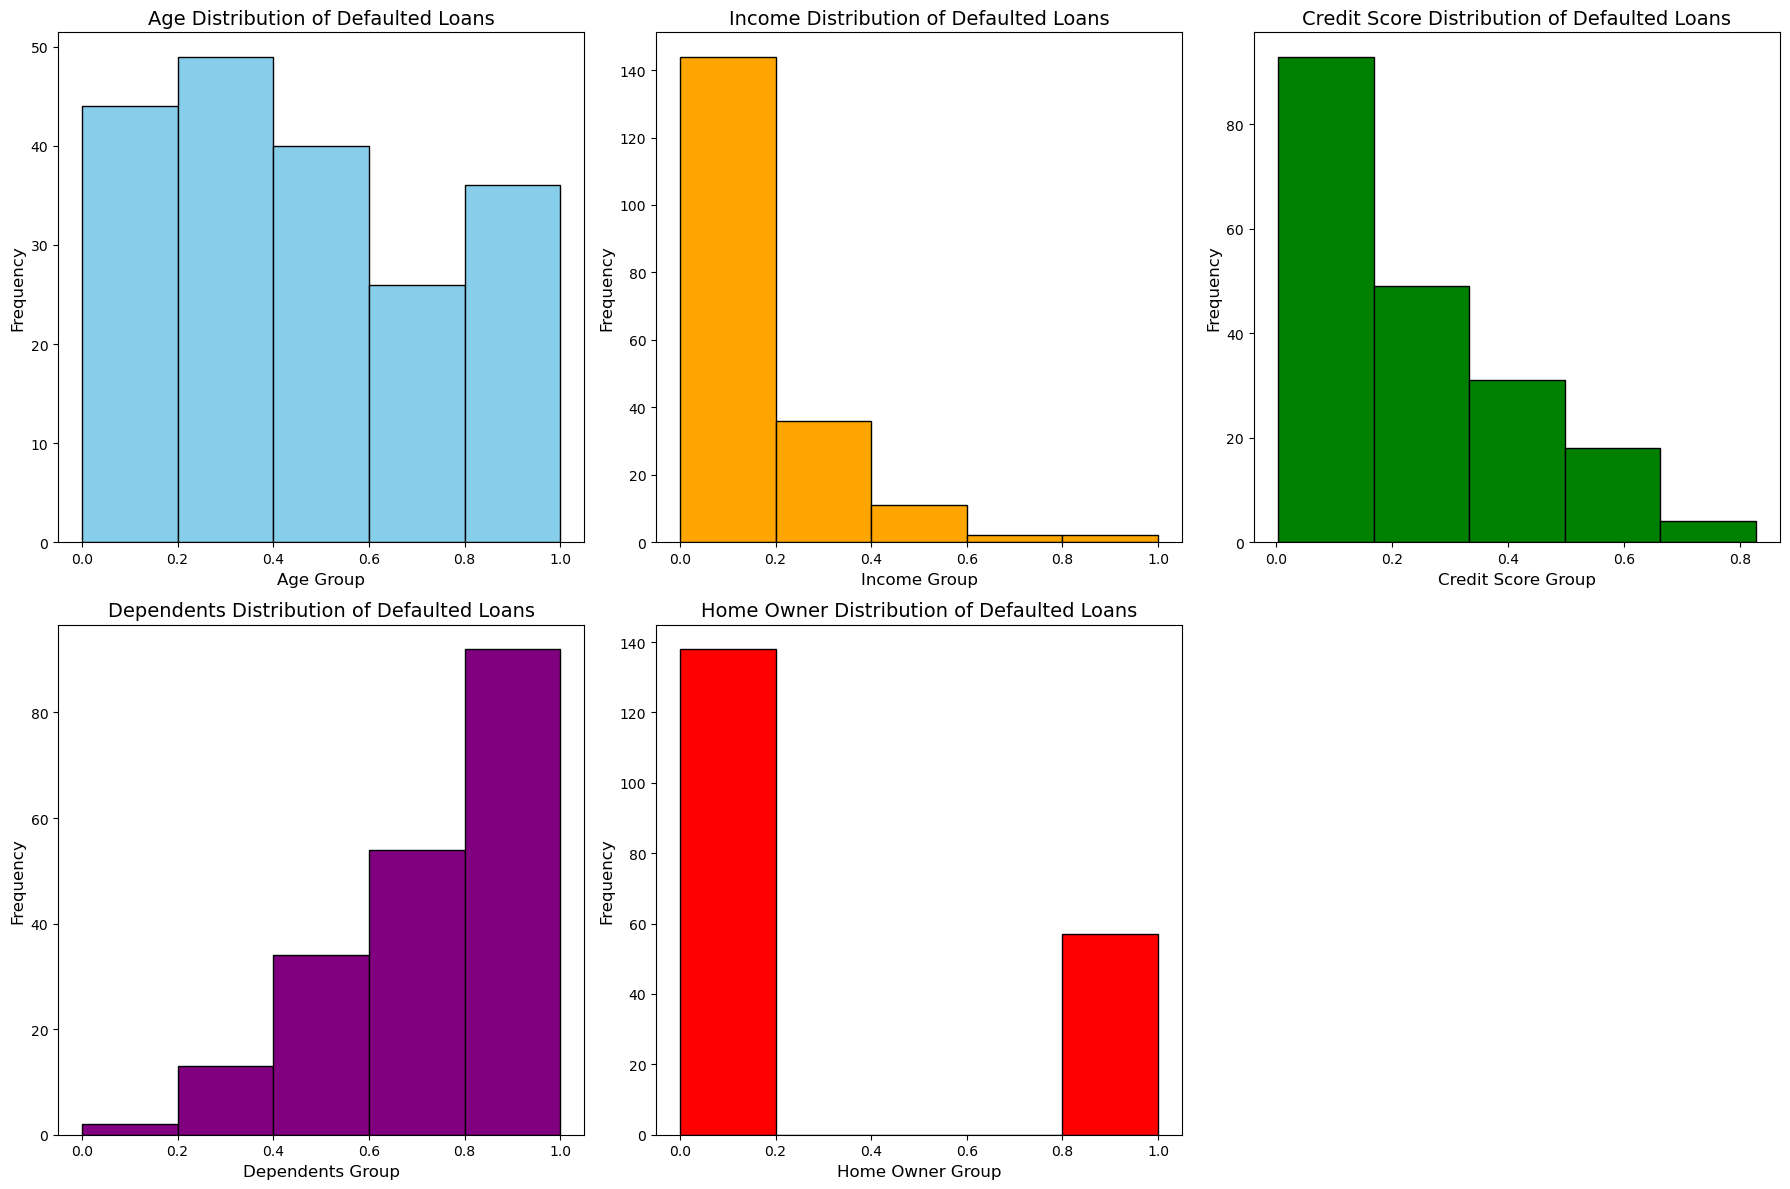

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out the rows where loan_default is 1 (defaulted loans)
defaulted_data = data_cleaned[data_cleaned['loan_default'] == 1]

# Define the number of bins (5 groups)
bins = 5

# Plotting the distribution for age
plt.figure(figsize=(18, 12))

# Age distribution
plt.subplot(2, 3, 1)
plt.hist(defaulted_data['age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Income distribution
plt.subplot(2, 3, 2)
plt.hist(defaulted_data['income'], bins=bins, color='orange', edgecolor='black')
plt.title('Income Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Credit score distribution
plt.subplot(2, 3, 3)
plt.hist(defaulted_data['credit_score'], bins=bins, color='green', edgecolor='black')
plt.title('Credit Score Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Dependents distribution
plt.subplot(2, 3, 4)
plt.hist(defaulted_data['dependents'], bins=bins, color='purple', edgecolor='black')
plt.title('Dependents Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Dependents Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Home owner distribution
plt.subplot(2, 3, 5)
plt.hist(defaulted_data['home_owner'], bins=bins, color='red', edgecolor='black')
plt.title('Home Owner Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Home Owner Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the layout for better readability
plt.tight_layout()
plt.show()


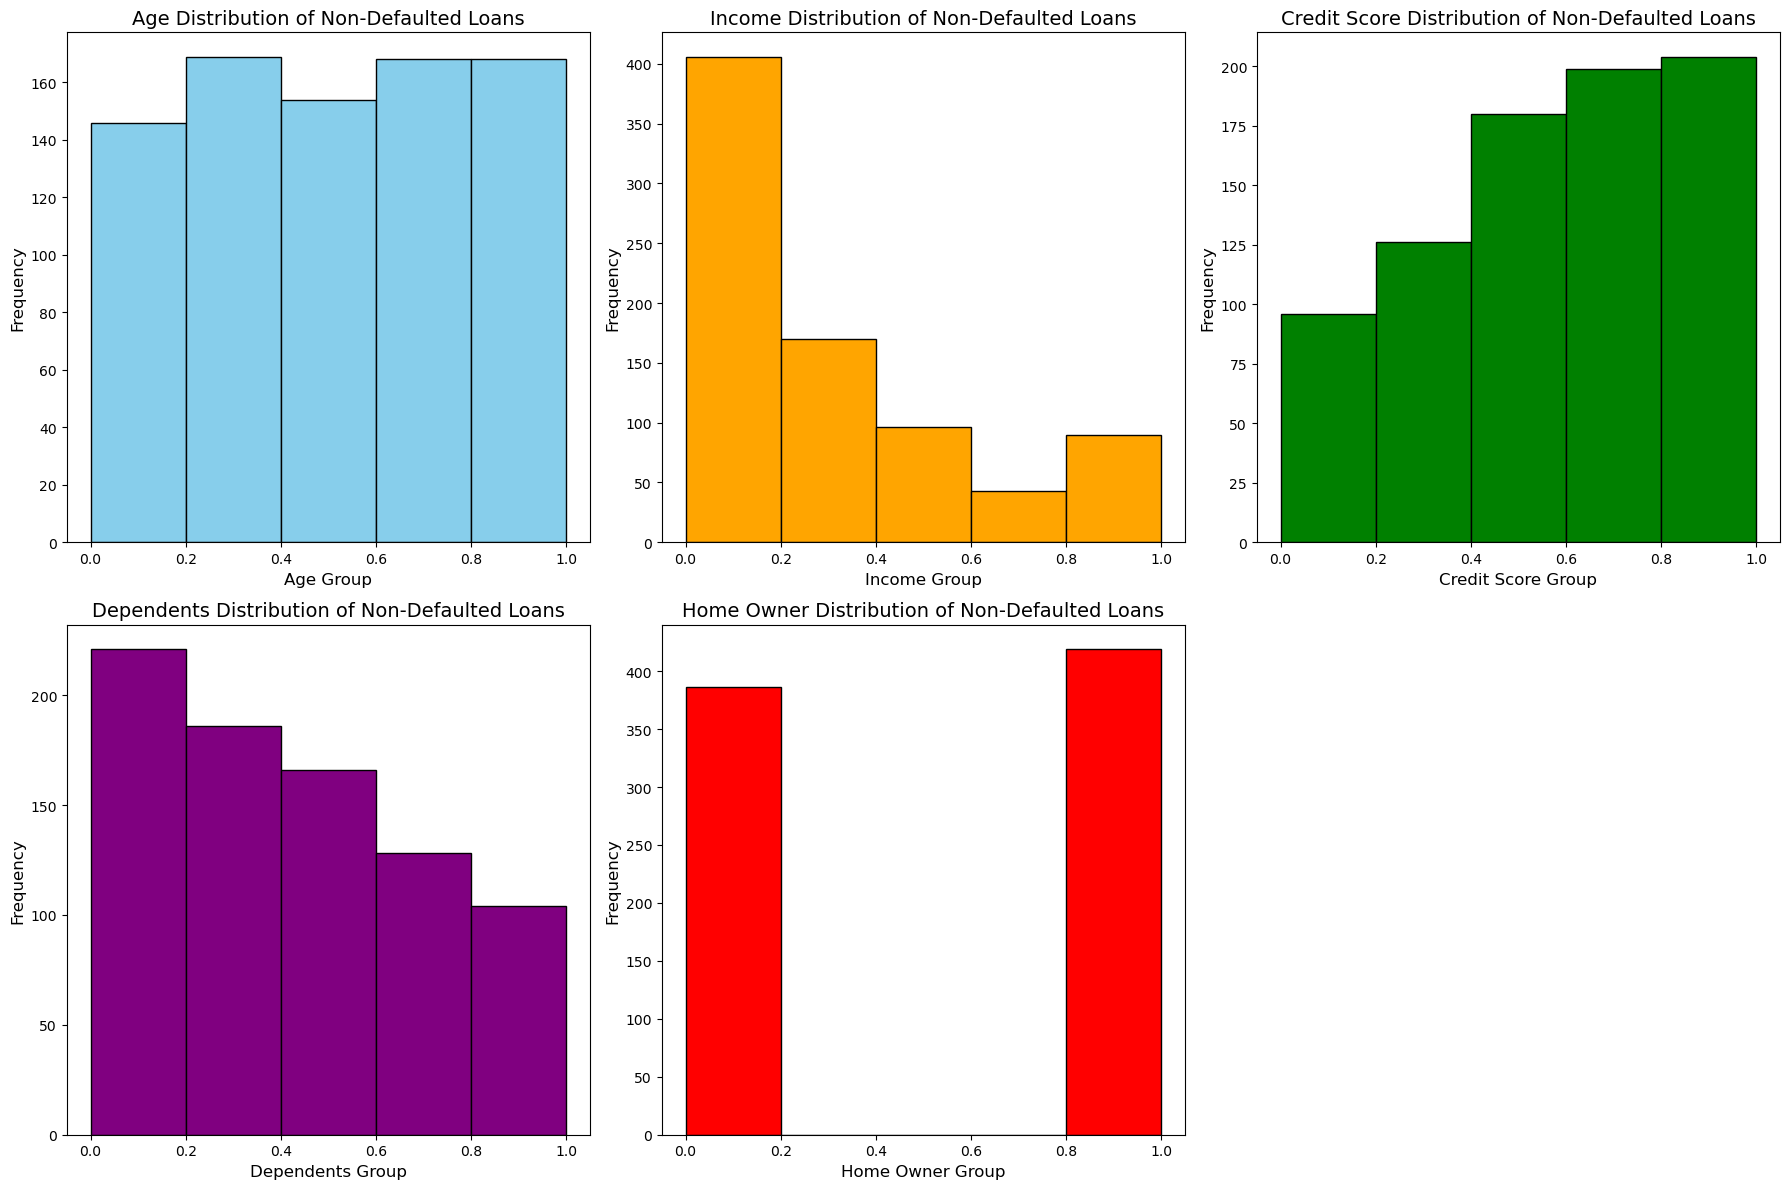

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out the rows where loan_default is 1 (defaulted loans)
defaulted_data = data_cleaned[data_cleaned['loan_default'] == 0]

# Define the number of bins (5 groups)
bins = 5

# Plotting the distribution for age
plt.figure(figsize=(18, 12))

# Age distribution
plt.subplot(2, 3, 1)
plt.hist(defaulted_data['age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Income distribution
plt.subplot(2, 3, 2)
plt.hist(defaulted_data['income'], bins=bins, color='orange', edgecolor='black')
plt.title('Income Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Credit score distribution
plt.subplot(2, 3, 3)
plt.hist(defaulted_data['credit_score'], bins=bins, color='green', edgecolor='black')
plt.title('Credit Score Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Dependents distribution
plt.subplot(2, 3, 4)
plt.hist(defaulted_data['dependents'], bins=bins, color='purple', edgecolor='black')
plt.title('Dependents Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Dependents Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Home owner distribution
plt.subplot(2, 3, 5)
plt.hist(defaulted_data['home_owner'], bins=bins, color='red', edgecolor='black')
plt.title('Home Owner Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Home Owner Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the layout for better readability
plt.tight_layout()
plt.show()


In [75]:
# Step 1: Separate data based on loan_default (1 = Default, 0 = No Default)
loan_default_1 = data_cleaned[data_cleaned['loan_default'] == 1]  # Default loans
loan_default_0 = data_cleaned[data_cleaned['loan_default'] == 0]  # Non-default loans

# Step 2: Calculate mean, median, and standard deviation for numeric features
numeric_columns = ['age', 'income', 'credit_score', 'dependents', 'home_owner']

# Mean, median, and standard deviation for loan_default = 1
mean_1 = loan_default_1[numeric_columns].mean()
median_1 = loan_default_1[numeric_columns].median()
std_1 = loan_default_1[numeric_columns].std()

# Mean, median, and standard deviation for loan_default = 0
mean_0 = loan_default_0[numeric_columns].mean()
median_0 = loan_default_0[numeric_columns].median()
std_0 = loan_default_0[numeric_columns].std()

# Display results
print("Statistics for loan_default = 1 (Defaulted Loans):")
print(pd.DataFrame({'Mean': mean_1, 'Median': median_1, 'Standard Deviation': std_1}))

print("\nStatistics for loan_default = 0 (Non-Defaulted Loans):")
print(pd.DataFrame({'Mean': mean_0, 'Median': median_0, 'Standard Deviation': std_0}))


Statistics for loan_default = 1 (Defaulted Loans):
                  Mean    Median  Standard Deviation
age           0.458922  0.428571            0.292445
income        0.152753  0.107504            0.172552
credit_score  0.236243  0.187614            0.184576
dependents    0.783333  0.750000            0.249053
home_owner    0.292308  0.000000            0.455994

Statistics for loan_default = 0 (Non-Defaulted Loans):
                  Mean    Median  Standard Deviation
age           0.511269  0.510204            0.291925
income        0.305860  0.196660            0.297442
credit_score  0.576422  0.601093            0.270689
dependents    0.409317  0.250000            0.342393
home_owner    0.520497  1.000000            0.499890


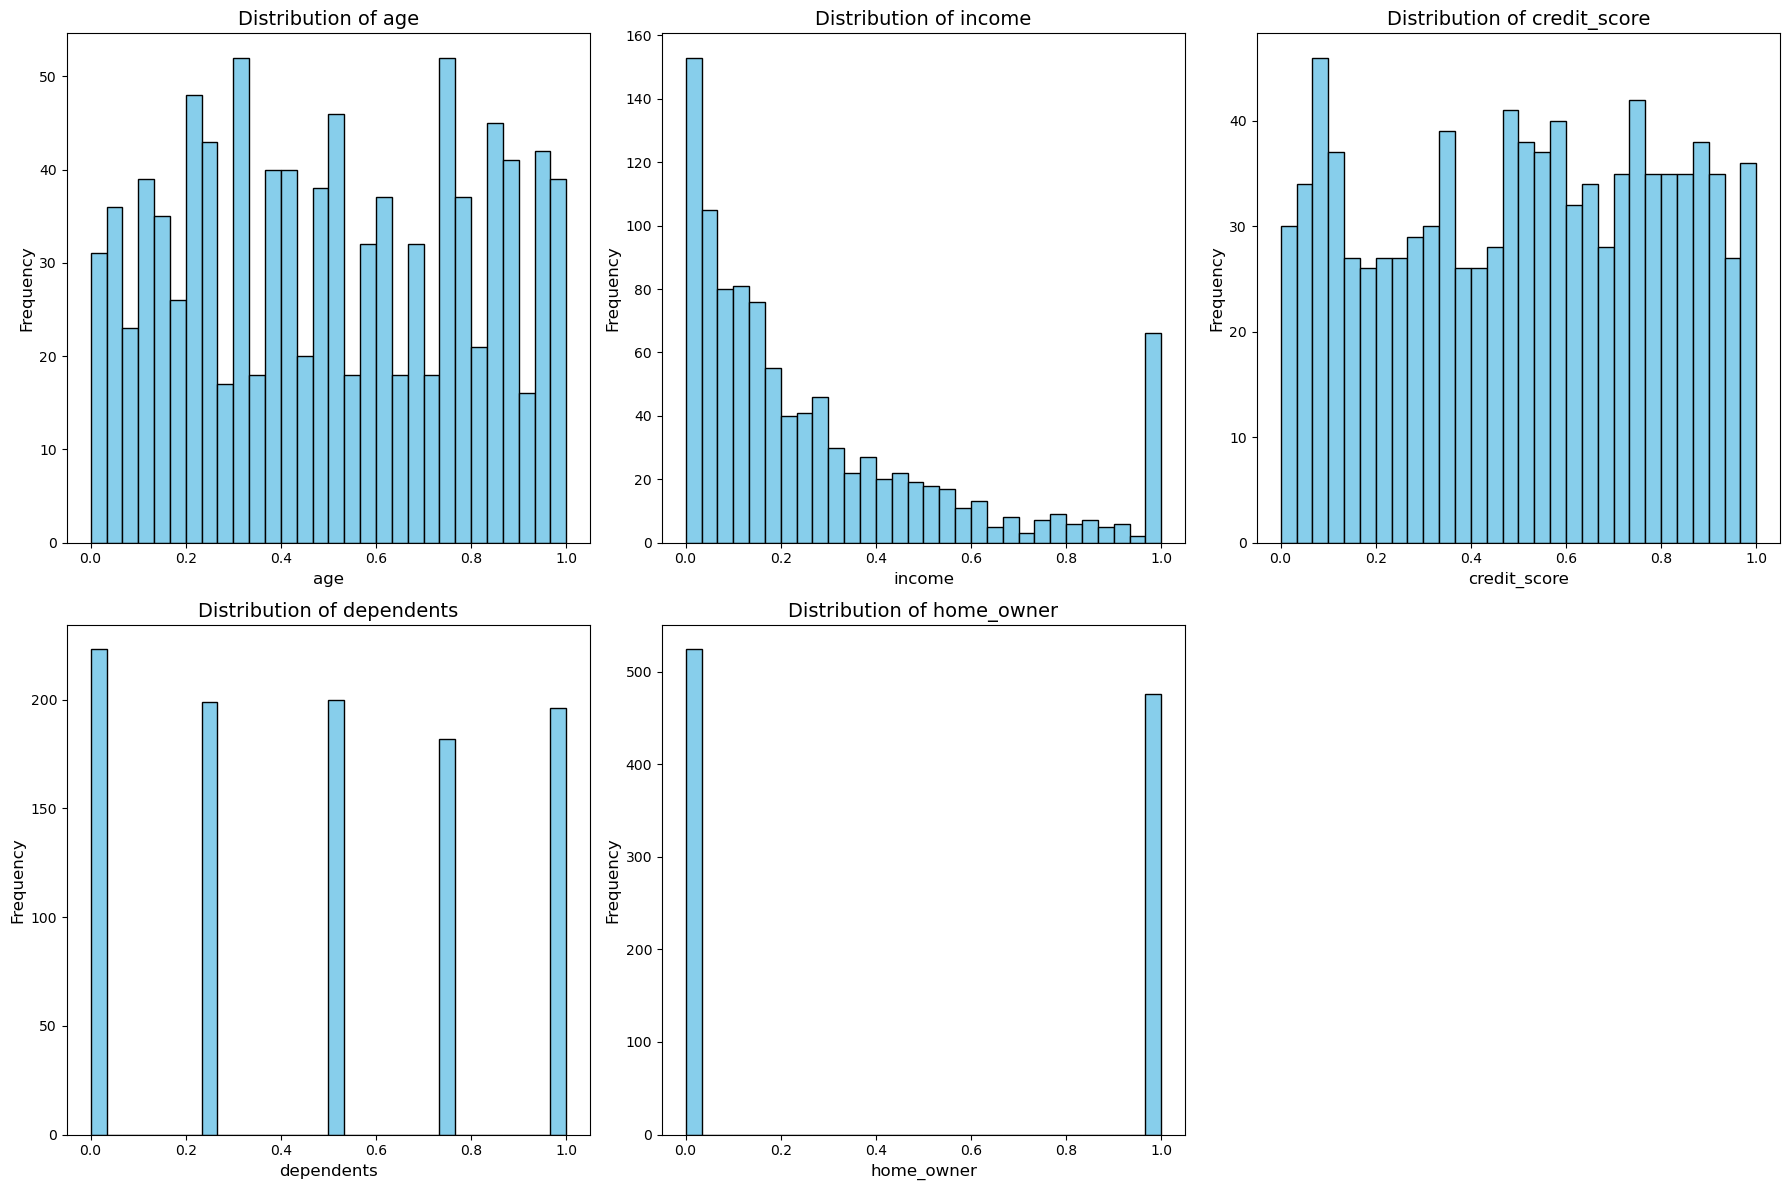

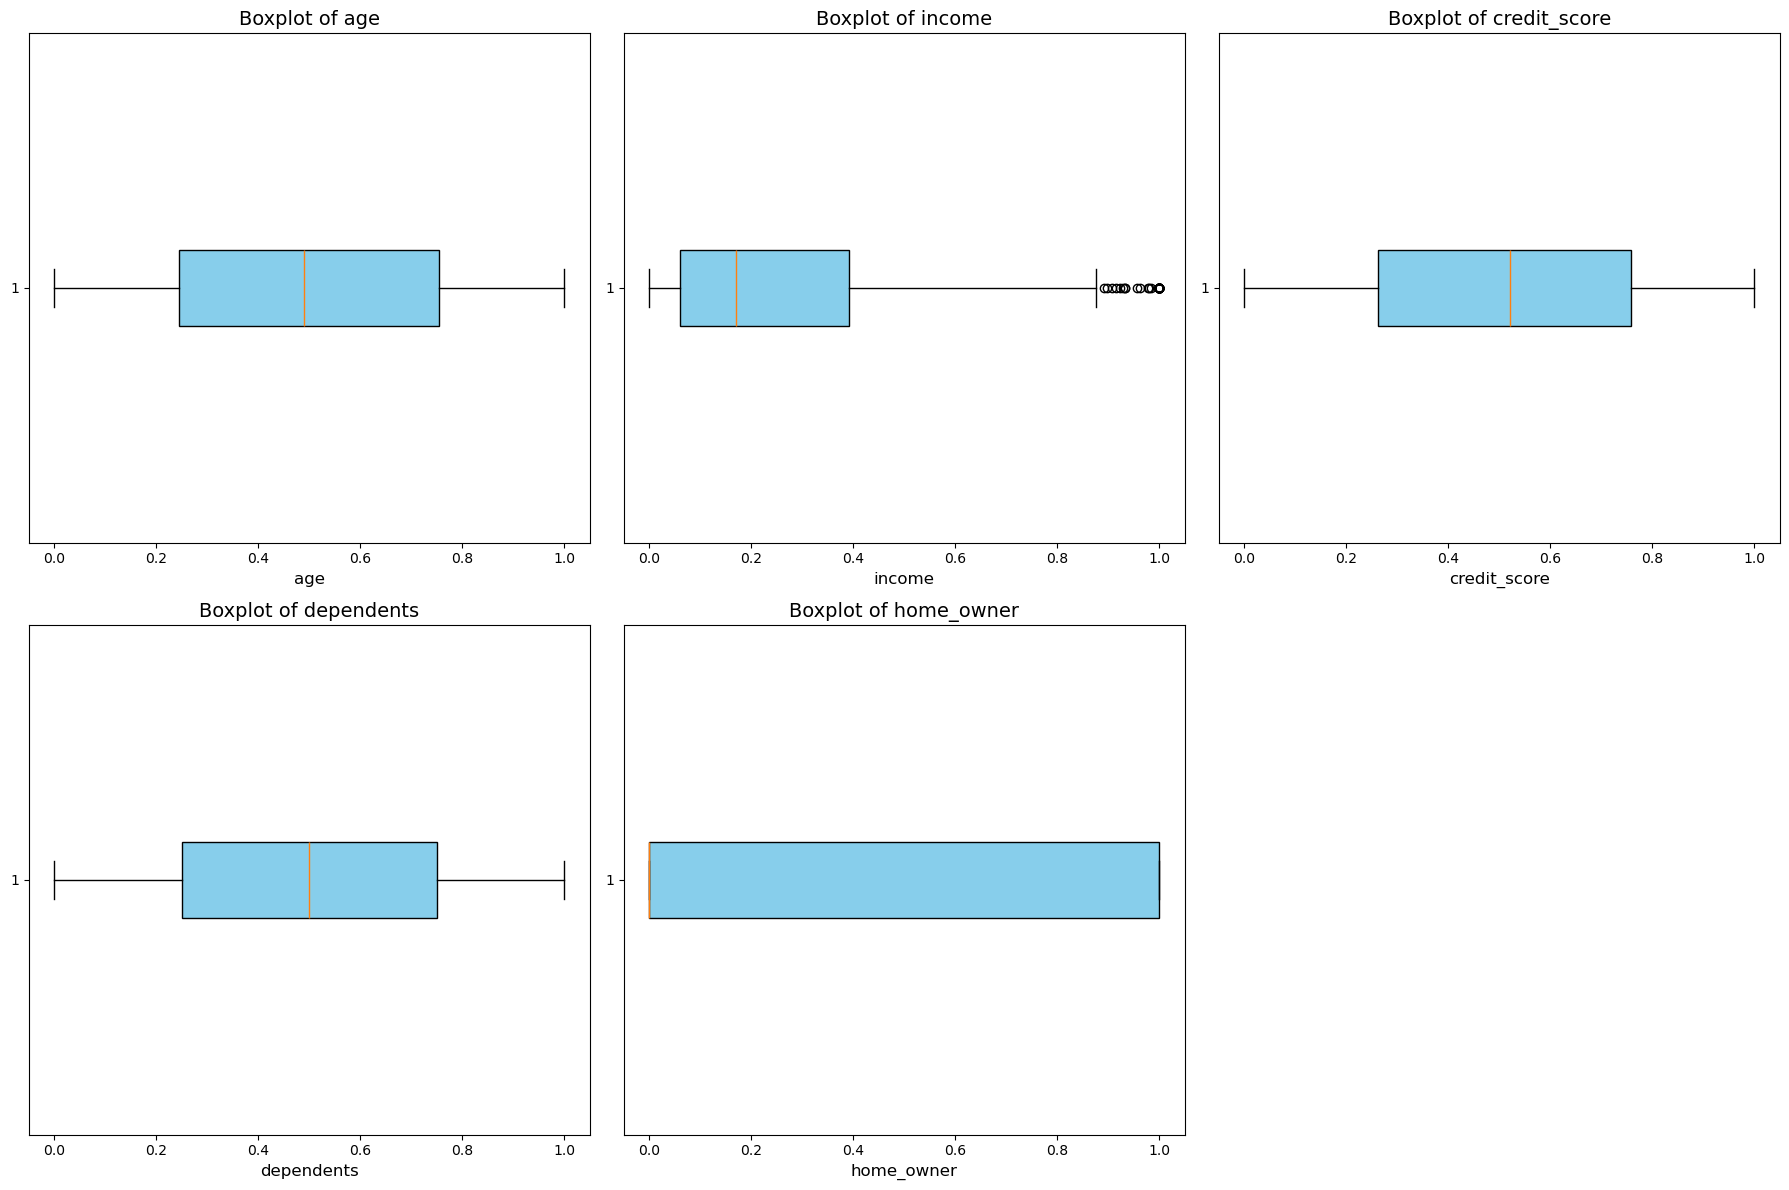

In [76]:
# Step 2: Check distribution and detect potential outliers using histograms and boxplots

# Plot histograms for numeric features
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_cleaned[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Plot boxplots for numeric features to detect outliers
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data_cleaned[col], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


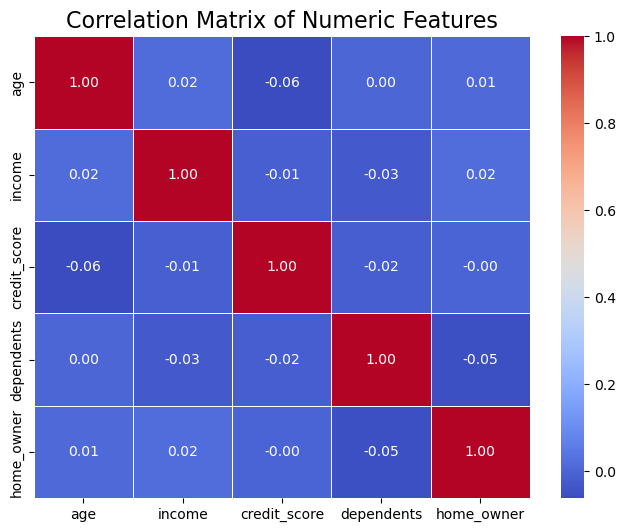

In [77]:
# Step 3: Check the correlation matrix for numeric features
correlation_matrix = data_cleaned[numeric_columns].corr()

# Plotting the correlation heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


In [78]:
# Step 4: Outlier detection using IQR (Interquartile Range)
Q1 = data_cleaned[numeric_columns].quantile(0.25)
Q3 = data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = ((data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR)))

# Display outliers
outliers_count = outliers.sum()
print(f"Outliers detected in each feature:\n{outliers_count}")


Outliers detected in each feature:
age              0
income          76
credit_score     0
dependents       0
home_owner       0
dtype: int64


Heirarchical Clustering

Tested P value [12, 24, 36]

P Value = 12

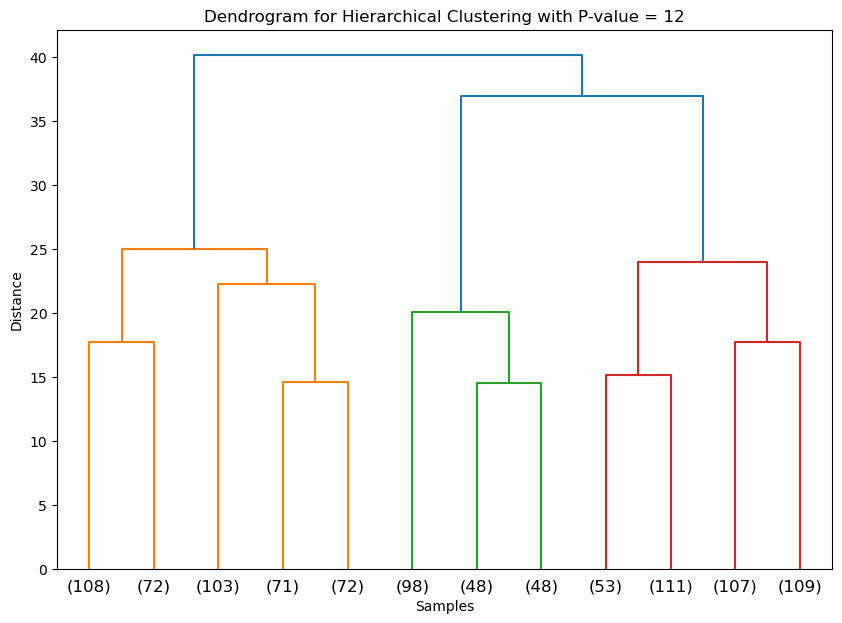

In [79]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering with P-value = 12')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


P Value = 24

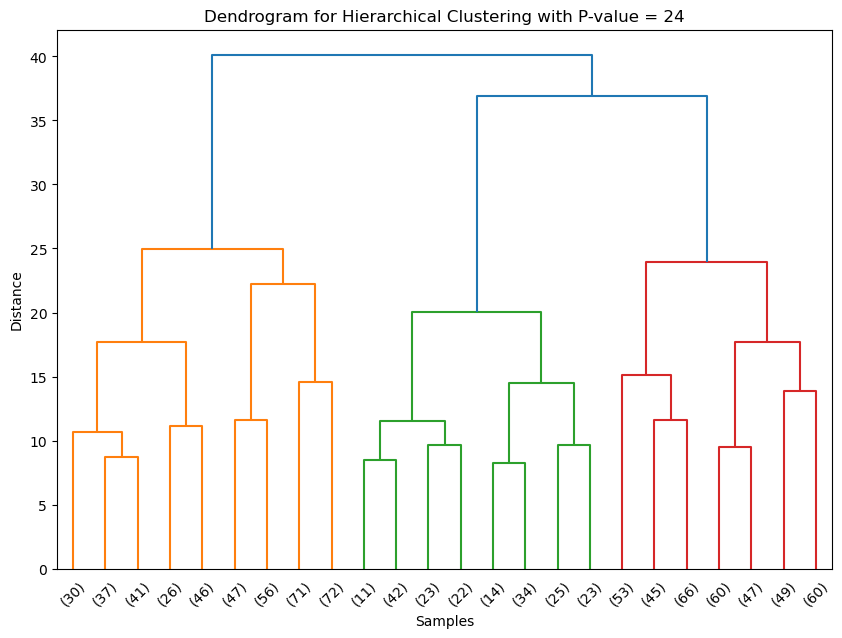

In [80]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=24)
plt.title('Dendrogram for Hierarchical Clustering with P-value = 24')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


P Value = 36

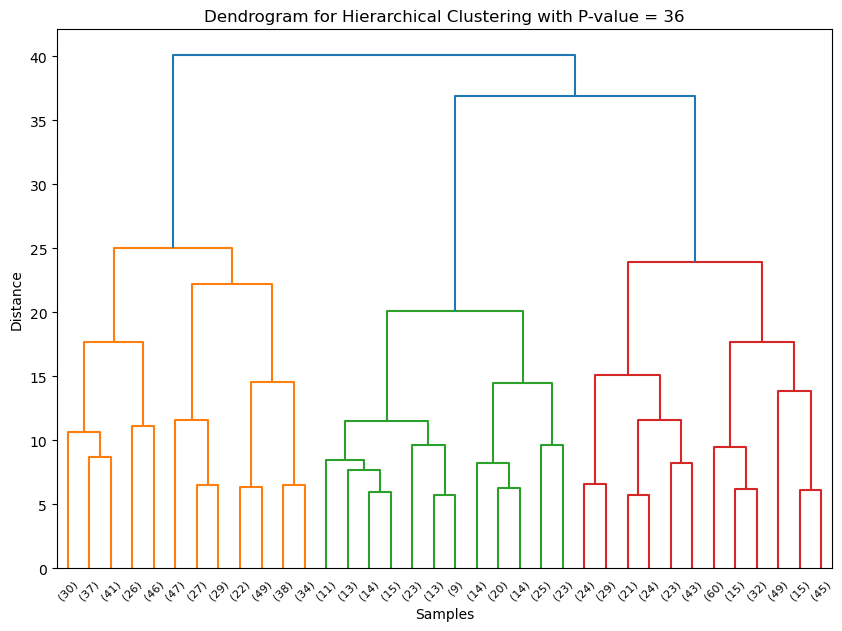

In [81]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=36)
plt.title('Dendrogram for Hierarchical Clustering with P-value = 36')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


K-Mean Clustering

c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

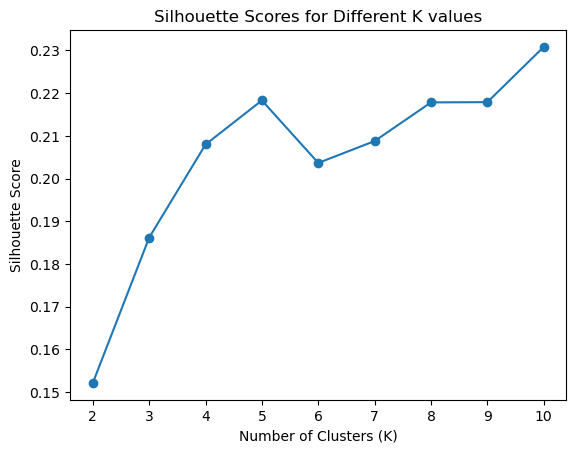

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Try different K values and calculate silhouette scores
sil_scores = []
K_range = range(2, 11)  # Testing K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    sil_scores.append(score)

# Step 3: Plot the silhouette scores for different K values
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores for Different K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

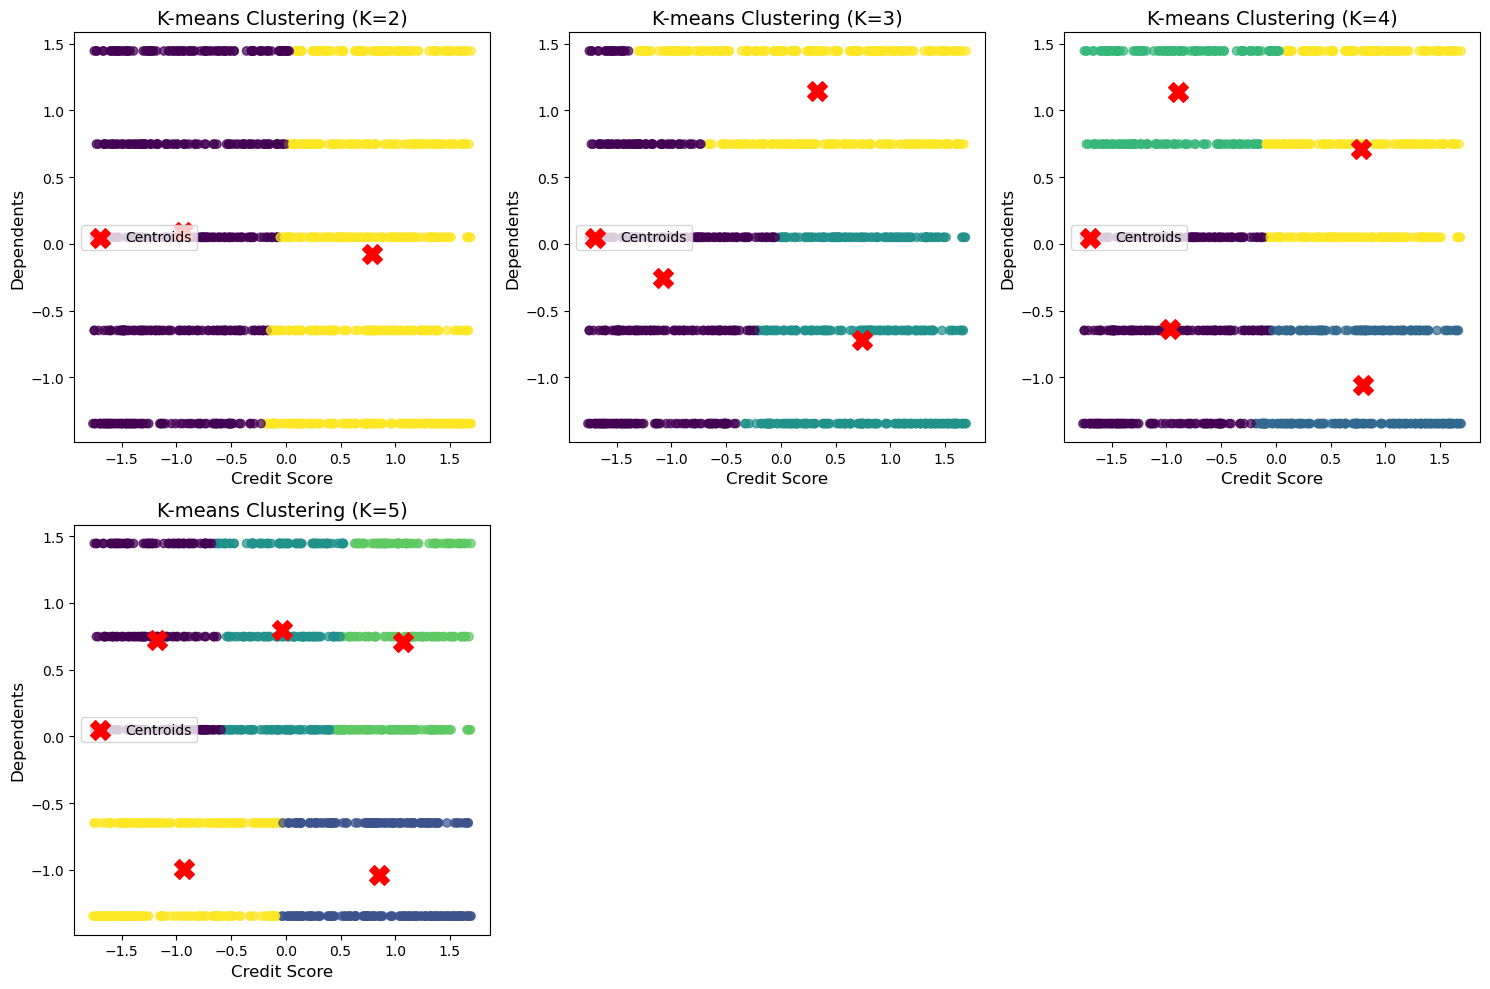

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Select the features 'credit_score' and 'dependents' for clustering
features = ['credit_score', 'dependents']
data_selected = data_cleaned[features]

# Step 2: Standardize the data (to ensure equal scale for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)  # Standardize the selected features

# Step 3: Apply K-means clustering for different K values (2 to 5 in this case)
K_range = range(2, 6)  # Testing K values from 2 to 5

# Step 4: Plot K-means clustering results for different K values
plt.figure(figsize=(15, 10))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Apply K-means clustering
    
    # Step 5: Plot the clustering result
    plt.subplot(2, 3, i)  # Create subplots for each K value
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
    
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Add titles and labels
    plt.title(f'K-means Clustering (K={k})', fontsize=14)
    plt.xlabel('Credit Score', fontsize=12)
    plt.ylabel('Dependents', fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout for a better view
plt.show()



c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe

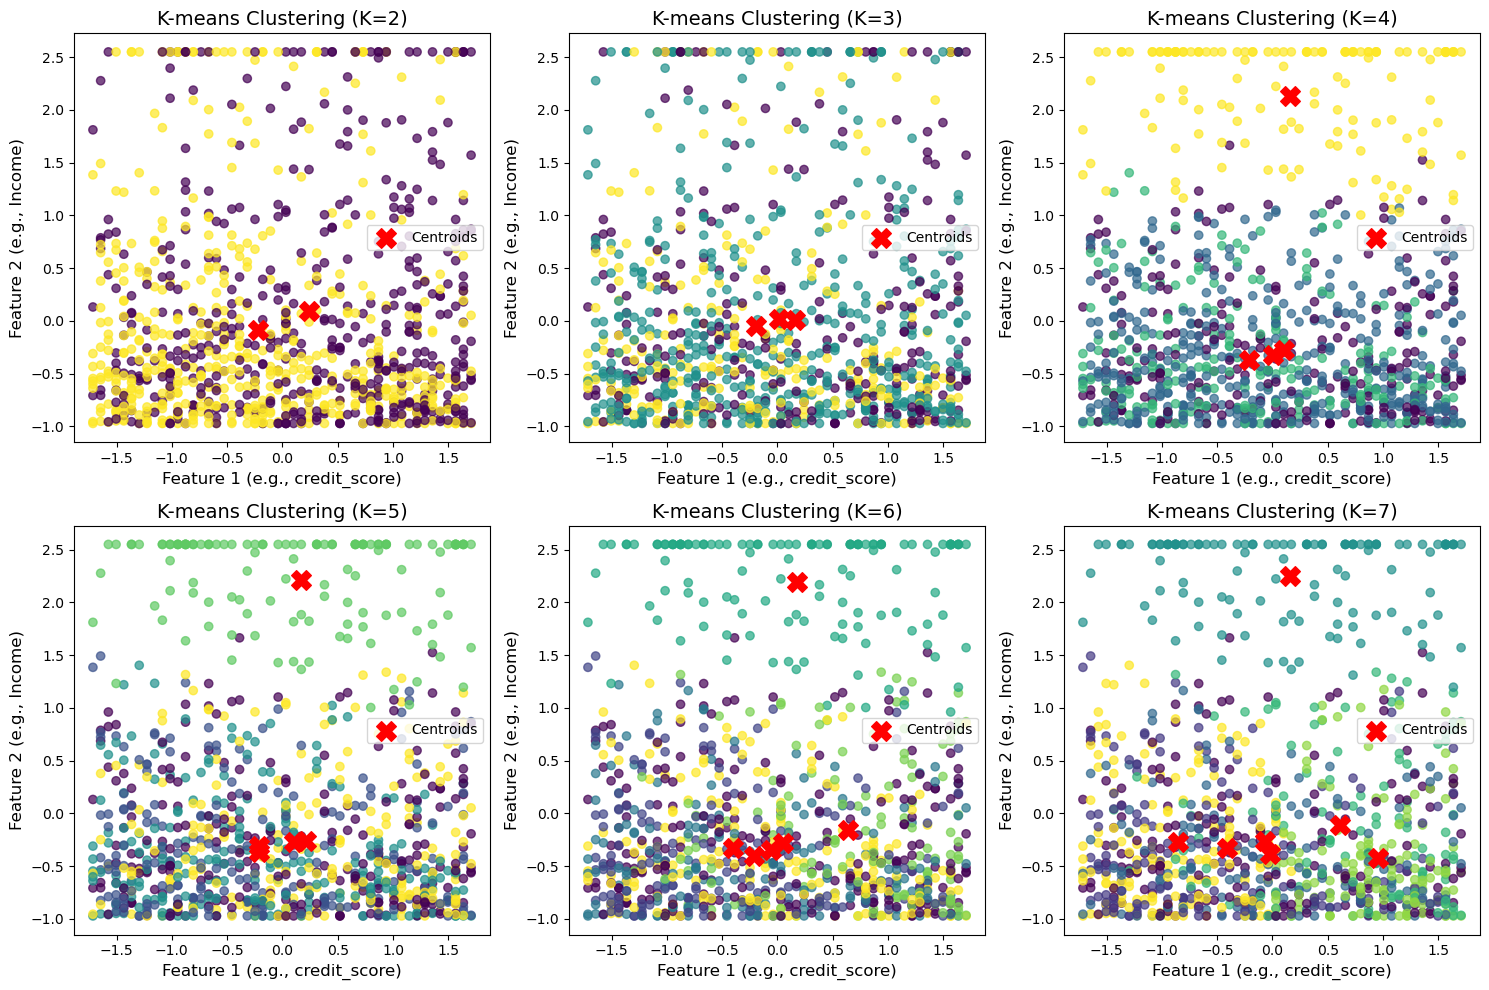

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Select features for clustering (excluding 'loan_default')
features = ['age', 'income', 'credit_score', 'dependents', 'home_owner']
data_selected = data_cleaned[features]

# Step 2: Standardize the data (to ensure equal scale for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)  # Standardize the selected features

# Step 3: Apply K-means clustering for different K values (2 to 7 in this case)
K_range = range(2, 8)  # Testing K values from 2 to 7 (you can adjust this)

# Step 4: Plot K-means clustering results for different K values
plt.figure(figsize=(15, 10))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Apply K-means clustering
    
    # Step 5: Plot the clustering result (2D projection of the first two features)
    plt.subplot(2, 3, i)  # Create subplots for each K value
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
    
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Add titles and labels
    plt.title(f'K-means Clustering (K={k})', fontsize=14)
    plt.xlabel('Feature 1 (e.g., credit_score)', fontsize=12)
    plt.ylabel('Feature 2 (e.g., Income)', fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout for a better view
plt.show()


MLP

In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# File path to the dataset
file_path = r'Data/loan_default_prediction.csv'

# Load the data from the file
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Print the first few rows to confirm successful loading
print("Data loaded successfully. First 5 rows:")
print(data.head())


Data loaded successfully. First 5 rows:
   age     income  credit_score  dependents  home_owner  loan_default
0   64  100000.00           583           3           0             0
1   45   16803.24           685           4           0             0
2   69   15418.51           498           2           0             0
3   63   11474.46           533           4           0             0
4   46   11536.00           454           0           1             0


In [86]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers with 32 and 16 neurons
                    activation='relu',           # Activation function for hidden layers
                    solver='adam',               # Optimizer
                    learning_rate_init=0.001,         # Learning Rate
                    max_iter=1000,               # Maximum number of iterations
                    random_state=42)

# Train the neural network
ann.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = ann.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       161
           1       0.83      0.87      0.85        39

    accuracy                           0.94       200
   macro avg       0.90      0.91      0.91       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
 [[154   7]
 [  5  34]]

ROC-AUC Score: 0.9855072463768116


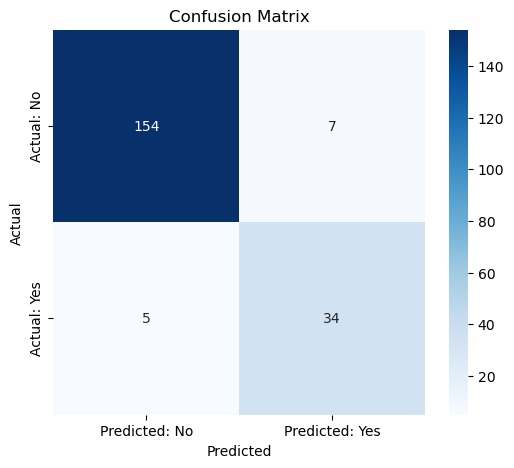


Confusion Matrix (Raw):
[[154   7]
 [  5  34]]


In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [90]:
# Experiment with a different network structure
ann_experiment_1 = MLPClassifier(hidden_layer_sizes=(16, 8),  # Two hidden layers, adjusted the amount of neurons
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_1.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_1 = ann_experiment_1.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.64

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.87      0.65      0.74       161
           1       0.30      0.62      0.40        39

    accuracy                           0.64       200
   macro avg       0.59      0.63      0.57       200
weighted avg       0.76      0.64      0.68       200


ROC-AUC Score: 0.9855072463768116


c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


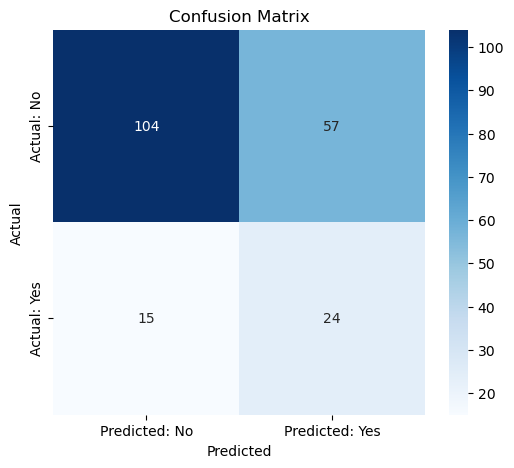


Confusion Matrix (Raw):
[[104  57]
 [ 15  24]]


In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [92]:
# Experiment with a different network structure
ann_experiment_2 = MLPClassifier(hidden_layer_sizes=(64, 32, 16),  # Three hidden layers
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_2.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_2 = ann_experiment_2.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_2))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.915

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       161
           1       0.92      0.62      0.74        39

    accuracy                           0.92       200
   macro avg       0.92      0.80      0.84       200
weighted avg       0.92      0.92      0.91       200


ROC-AUC Score: 0.9855072463768116


c:\Users\jesse\anaconda3\envs\sl_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


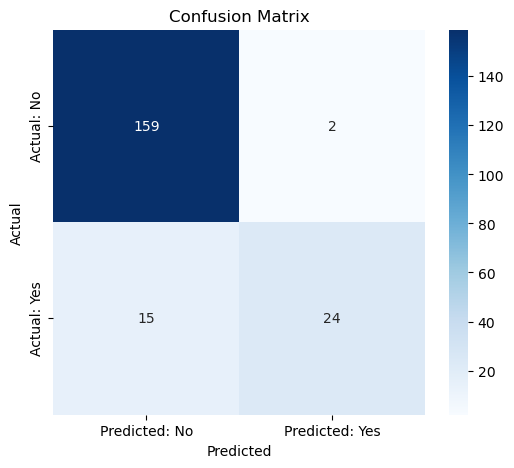


Confusion Matrix (Raw):
[[159   2]
 [ 15  24]]


In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [94]:
# Experiment with a different network structure
ann_experiment_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16),  # Four hidden layers
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_3.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_3 = ann_experiment_3.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_3))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.93

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.82      0.82      0.82        39

    accuracy                           0.93       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.93      0.93      0.93       200


ROC-AUC Score: 0.9855072463768116


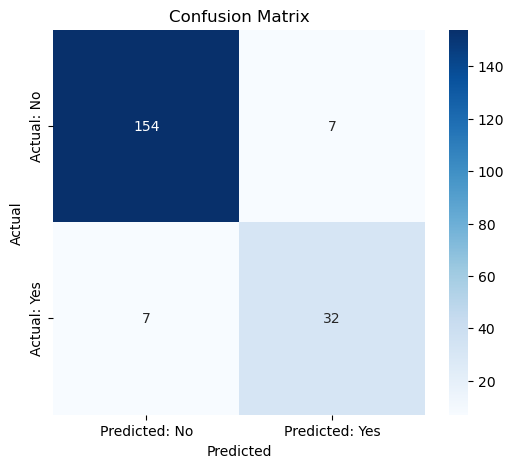


Confusion Matrix (Raw):
[[154   7]
 [  7  32]]


In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


Logistic Regression

In [96]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = r'Data/loan_default_prediction.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset info
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


In [97]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been standardized.")


Data has been standardized.


In [98]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model has been trained.")


Logistic Regression model has been trained.


In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# Calculate ROC-AUC Score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       161
           1       0.86      0.82      0.84        39

    accuracy                           0.94       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.94      0.94      0.94       200


Confusion Matrix:
 [[156   5]
 [  7  32]]

ROC-AUC Score: 0.9855072463768116


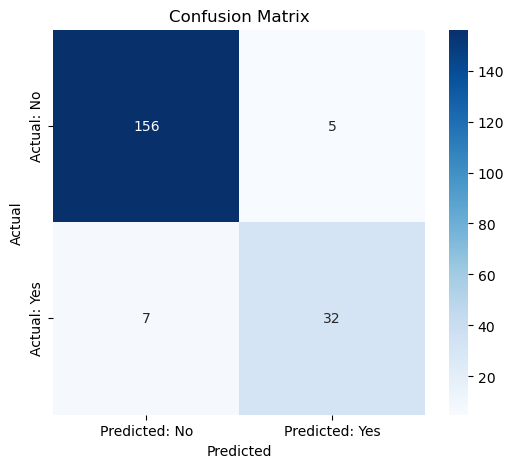


Confusion Matrix (Raw):
[[156   5]
 [  7  32]]


In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [101]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_1 = LogisticRegression(class_weight='balanced', C=0.5, random_state=42)

# Train the tuned model
log_reg_experiment_1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_1 = log_reg_experiment_1.predict(X_test_scaled)
y_pred_proba_experiment_1 = log_reg_experiment_1.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_1))


Tuned Logistic Regression Results
Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       161
           1       0.73      0.97      0.84        39

    accuracy                           0.93       200
   macro avg       0.86      0.94      0.89       200
weighted avg       0.94      0.93      0.93       200


Confusion Matrix:
 [[147  14]
 [  1  38]]

ROC-AUC Score: 0.9858257684344641


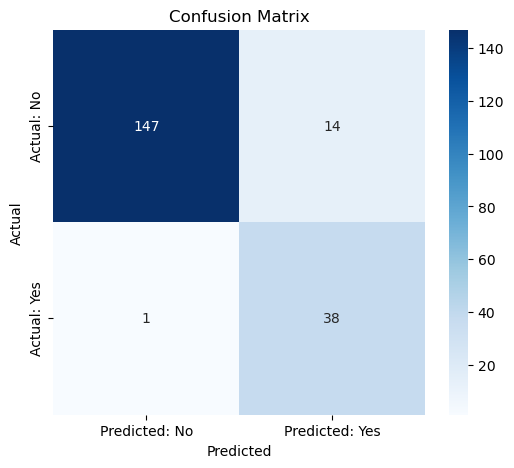


Confusion Matrix (Raw):
[[147  14]
 [  1  38]]


In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [103]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_2 = LogisticRegression(class_weight='balanced', C=0.005, random_state=42)

# Train the tuned model
log_reg_experiment_2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_2 = log_reg_experiment_2.predict(X_test_scaled)
y_pred_proba_experiment_2 = log_reg_experiment_2.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_2))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_2))


Tuned Logistic Regression Results
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93       161
           1       0.66      1.00      0.80        39

    accuracy                           0.90       200
   macro avg       0.83      0.94      0.86       200
weighted avg       0.93      0.90      0.91       200


Confusion Matrix:
 [[141  20]
 [  0  39]]

ROC-AUC Score: 0.9847109412326804


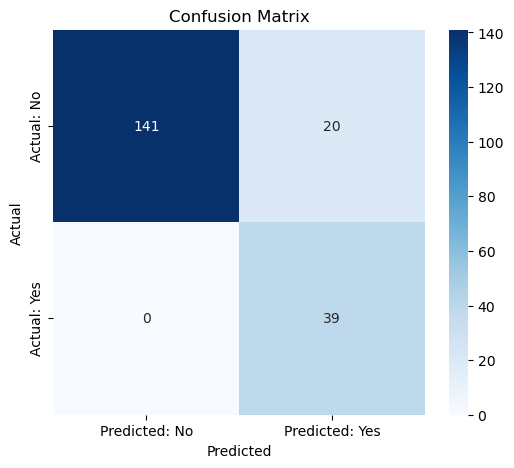


Confusion Matrix (Raw):
[[141  20]
 [  0  39]]


In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [105]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_3 = LogisticRegression(class_weight='balanced', C=0.001, random_state=42)

# Train the tuned model
log_reg_experiment_3.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_3 = log_reg_experiment_3.predict(X_test_scaled)
y_pred_proba_experiment_3 = log_reg_experiment_3.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_3))


Tuned Logistic Regression Results
Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93       161
           1       0.64      1.00      0.78        39

    accuracy                           0.89       200
   macro avg       0.82      0.93      0.85       200
weighted avg       0.93      0.89      0.90       200


Confusion Matrix:
 [[139  22]
 [  0  39]]

ROC-AUC Score: 0.9850294632903329


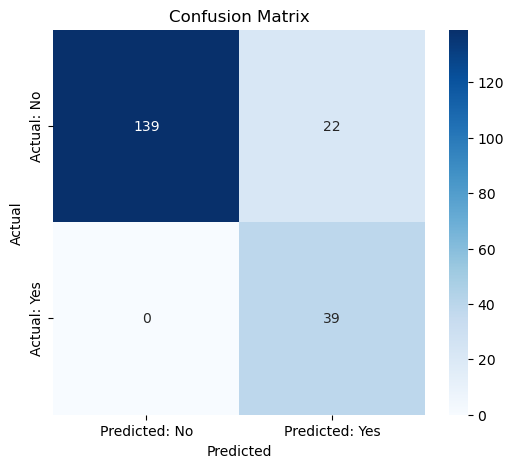


Confusion Matrix (Raw):
[[139  22]
 [  0  39]]


In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [107]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_4 = LogisticRegression(class_weight='balanced', C=1, random_state=42)

# Train the tuned model
log_reg_experiment_4.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_4 = log_reg_experiment_4.predict(X_test_scaled)
y_pred_proba_experiment_4 = log_reg_experiment_4.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_4))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_4))


Tuned Logistic Regression Results
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       161
           1       0.75      0.97      0.84        39

    accuracy                           0.93       200
   macro avg       0.87      0.95      0.90       200
weighted avg       0.94      0.93      0.93       200


Confusion Matrix:
 [[148  13]
 [  1  38]]

ROC-AUC Score: 0.9858257684344641


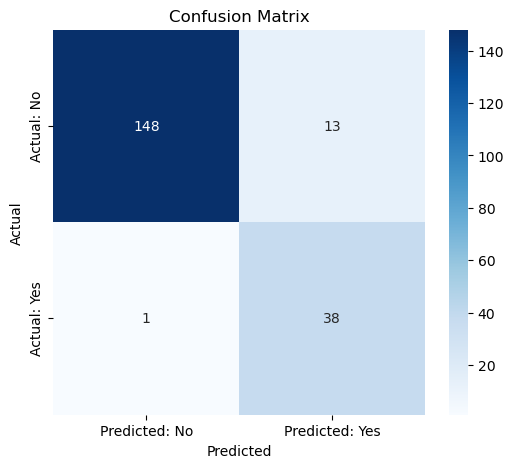


Confusion Matrix (Raw):
[[148  13]
 [  1  38]]


In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_4)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


Decision Tree

In [109]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = r'Data/loan_default_prediction.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset info
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


In [110]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been standardized.")


Data has been standardized.


In [111]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train_scaled, y_train)

print("Decision Tree model has been trained.")


Decision Tree model has been trained.


In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# Calculate ROC-AUC Score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.915

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       161
           1       0.81      0.74      0.77        39

    accuracy                           0.92       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.91      0.92      0.91       200


Confusion Matrix:
 [[154   7]
 [ 10  29]]

ROC-AUC Score: 0.8500557413600892


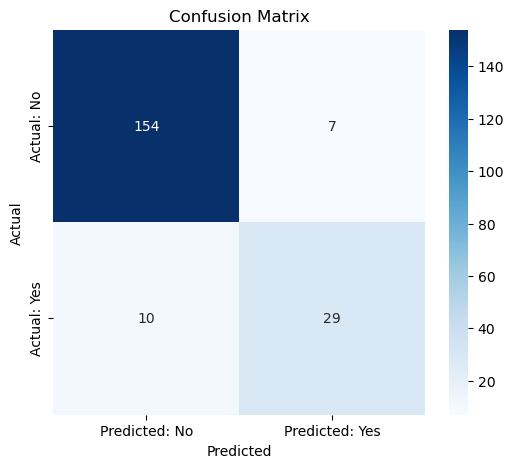


Confusion Matrix (Raw):
[[154   7]
 [ 10  29]]


In [113]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [114]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Test various depths
    'min_samples_split': [2, 5, 10],  # Test minimum samples to split
    'class_weight': ['balanced', None]  # Adjust class weights for imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_tree = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_tree.predict(X_test_scaled)
y_pred_proba_best = best_tree.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model
print("\nBest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best))


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10}

Best Model Evaluation
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.63      0.79      0.70        39

    accuracy                           0.87       200
   macro avg       0.79      0.84      0.81       200
weighted avg       0.89      0.87      0.88       200


Confusion Matrix:
 [[143  18]
 [  8  31]]

ROC-AUC Score: 0.8739448956840261


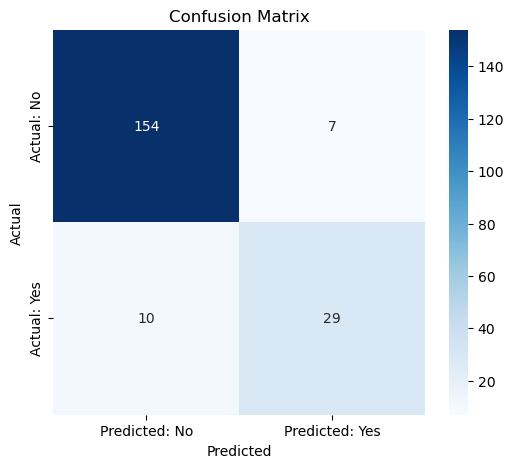


Confusion Matrix (Raw):
[[154   7]
 [ 10  29]]


In [115]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# 1. Data loading and splitting
file_path = r'Data/loan_default_prediction.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [117]:
# 3. Adjusting the hyperparameters
max_depth = 5  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_1 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       161
           1       0.57      0.92      0.71        39

    accuracy                           0.85       200
   macro avg       0.77      0.88      0.80       200
weighted avg       0.90      0.85      0.86       200


Confusion Matrix:
 [[134  27]
 [  3  36]]

ROC-AUC Score: 0.932712215320911


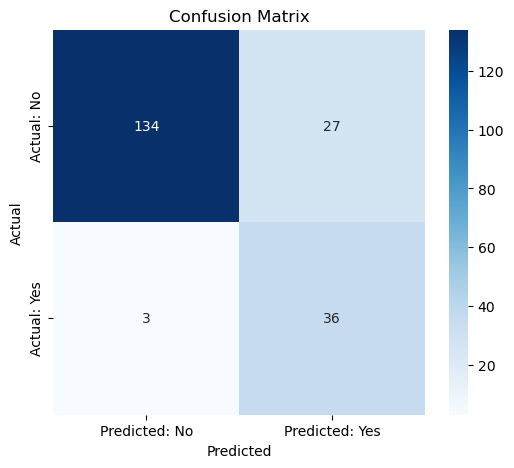


Confusion Matrix (Raw):
[[134  27]
 [  3  36]]


In [118]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [119]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_2 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_2))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.63      0.79      0.70        39

    accuracy                           0.87       200
   macro avg       0.79      0.84      0.81       200
weighted avg       0.89      0.87      0.88       200


Confusion Matrix:
 [[143  18]
 [  8  31]]

ROC-AUC Score: 0.8739448956840261


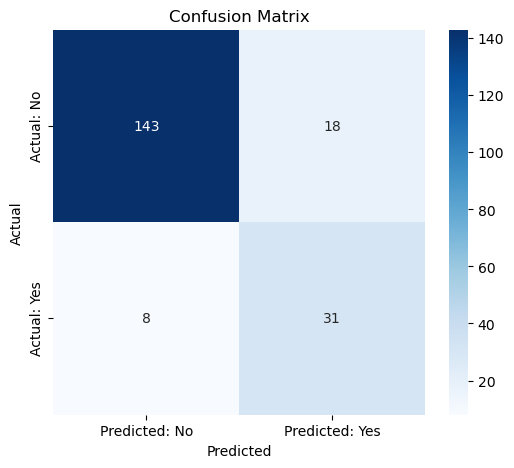


Confusion Matrix (Raw):
[[143  18]
 [  8  31]]


In [120]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [121]:
# 3. Adjusting the hyperparameters
max_depth = 20  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_3 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.63      0.79      0.70        39

    accuracy                           0.87       200
   macro avg       0.79      0.84      0.81       200
weighted avg       0.89      0.87      0.88       200


Confusion Matrix:
 [[143  18]
 [  8  31]]

ROC-AUC Score: 0.8739448956840261


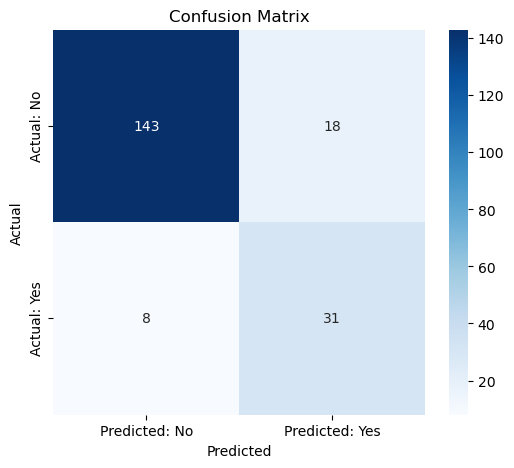


Confusion Matrix (Raw):
[[143  18]
 [  8  31]]


In [122]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [123]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 20  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_4 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_4))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       161
           1       0.60      0.87      0.71        39

    accuracy                           0.86       200
   macro avg       0.78      0.86      0.81       200
weighted avg       0.89      0.86      0.87       200


Confusion Matrix:
 [[138  23]
 [  5  34]]

ROC-AUC Score: 0.9084249084249083


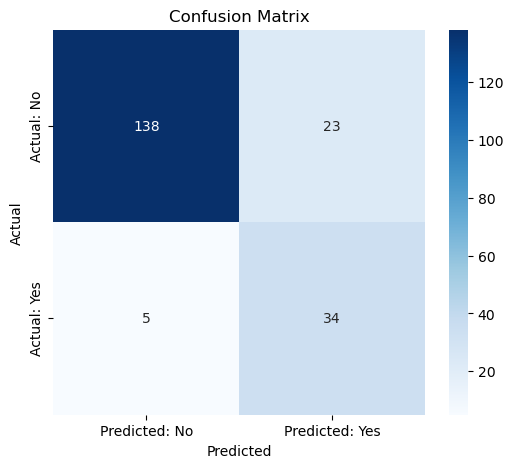


Confusion Matrix (Raw):
[[138  23]
 [  5  34]]


In [124]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_4)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [125]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 40  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_5 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_5))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_5))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_5))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       161
           1       0.55      0.92      0.69        39

    accuracy                           0.83       200
   macro avg       0.76      0.87      0.79       200
weighted avg       0.89      0.83      0.85       200


Confusion Matrix:
 [[131  30]
 [  3  36]]

ROC-AUC Score: 0.9306418219461697


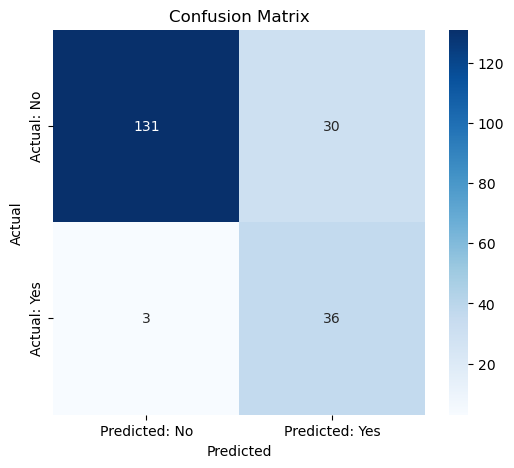


Confusion Matrix (Raw):
[[131  30]
 [  3  36]]


In [126]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_5)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [127]:
# 3. Adjusting the hyperparameters
max_depth = 20  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 40  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_6 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_6))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_6))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_6))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       161
           1       0.55      0.92      0.69        39

    accuracy                           0.83       200
   macro avg       0.76      0.87      0.79       200
weighted avg       0.89      0.83      0.85       200


Confusion Matrix:
 [[131  30]
 [  3  36]]

ROC-AUC Score: 0.9306418219461697


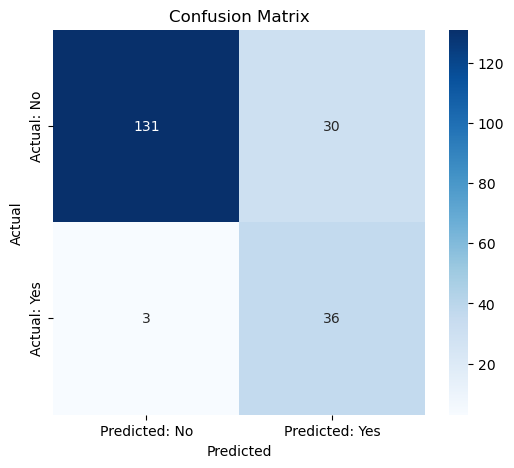


Confusion Matrix (Raw):
[[131  30]
 [  3  36]]


In [128]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_6)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)
